In [1]:
import numpy as np
import pandas as pd
import seaborn as ans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle


import warnings
warnings.filterwarnings('ignore')


In [2]:
data =pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv")
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
data = data.drop('Serial No.',axis =1)

In [4]:
data['GRE Score']  = data["GRE Score"].fillna(data["GRE Score"].mean())


In [5]:
data["TOEFL Score"] = data["TOEFL Score"].fillna(data["TOEFL Score"].mean())


In [6]:

data["University Rating"]  = data["University Rating"].fillna(data["University Rating"].mode()[0])

In [7]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
x = data.drop(columns = ["Chance of Admit"])
y = data["Chance of Admit"]

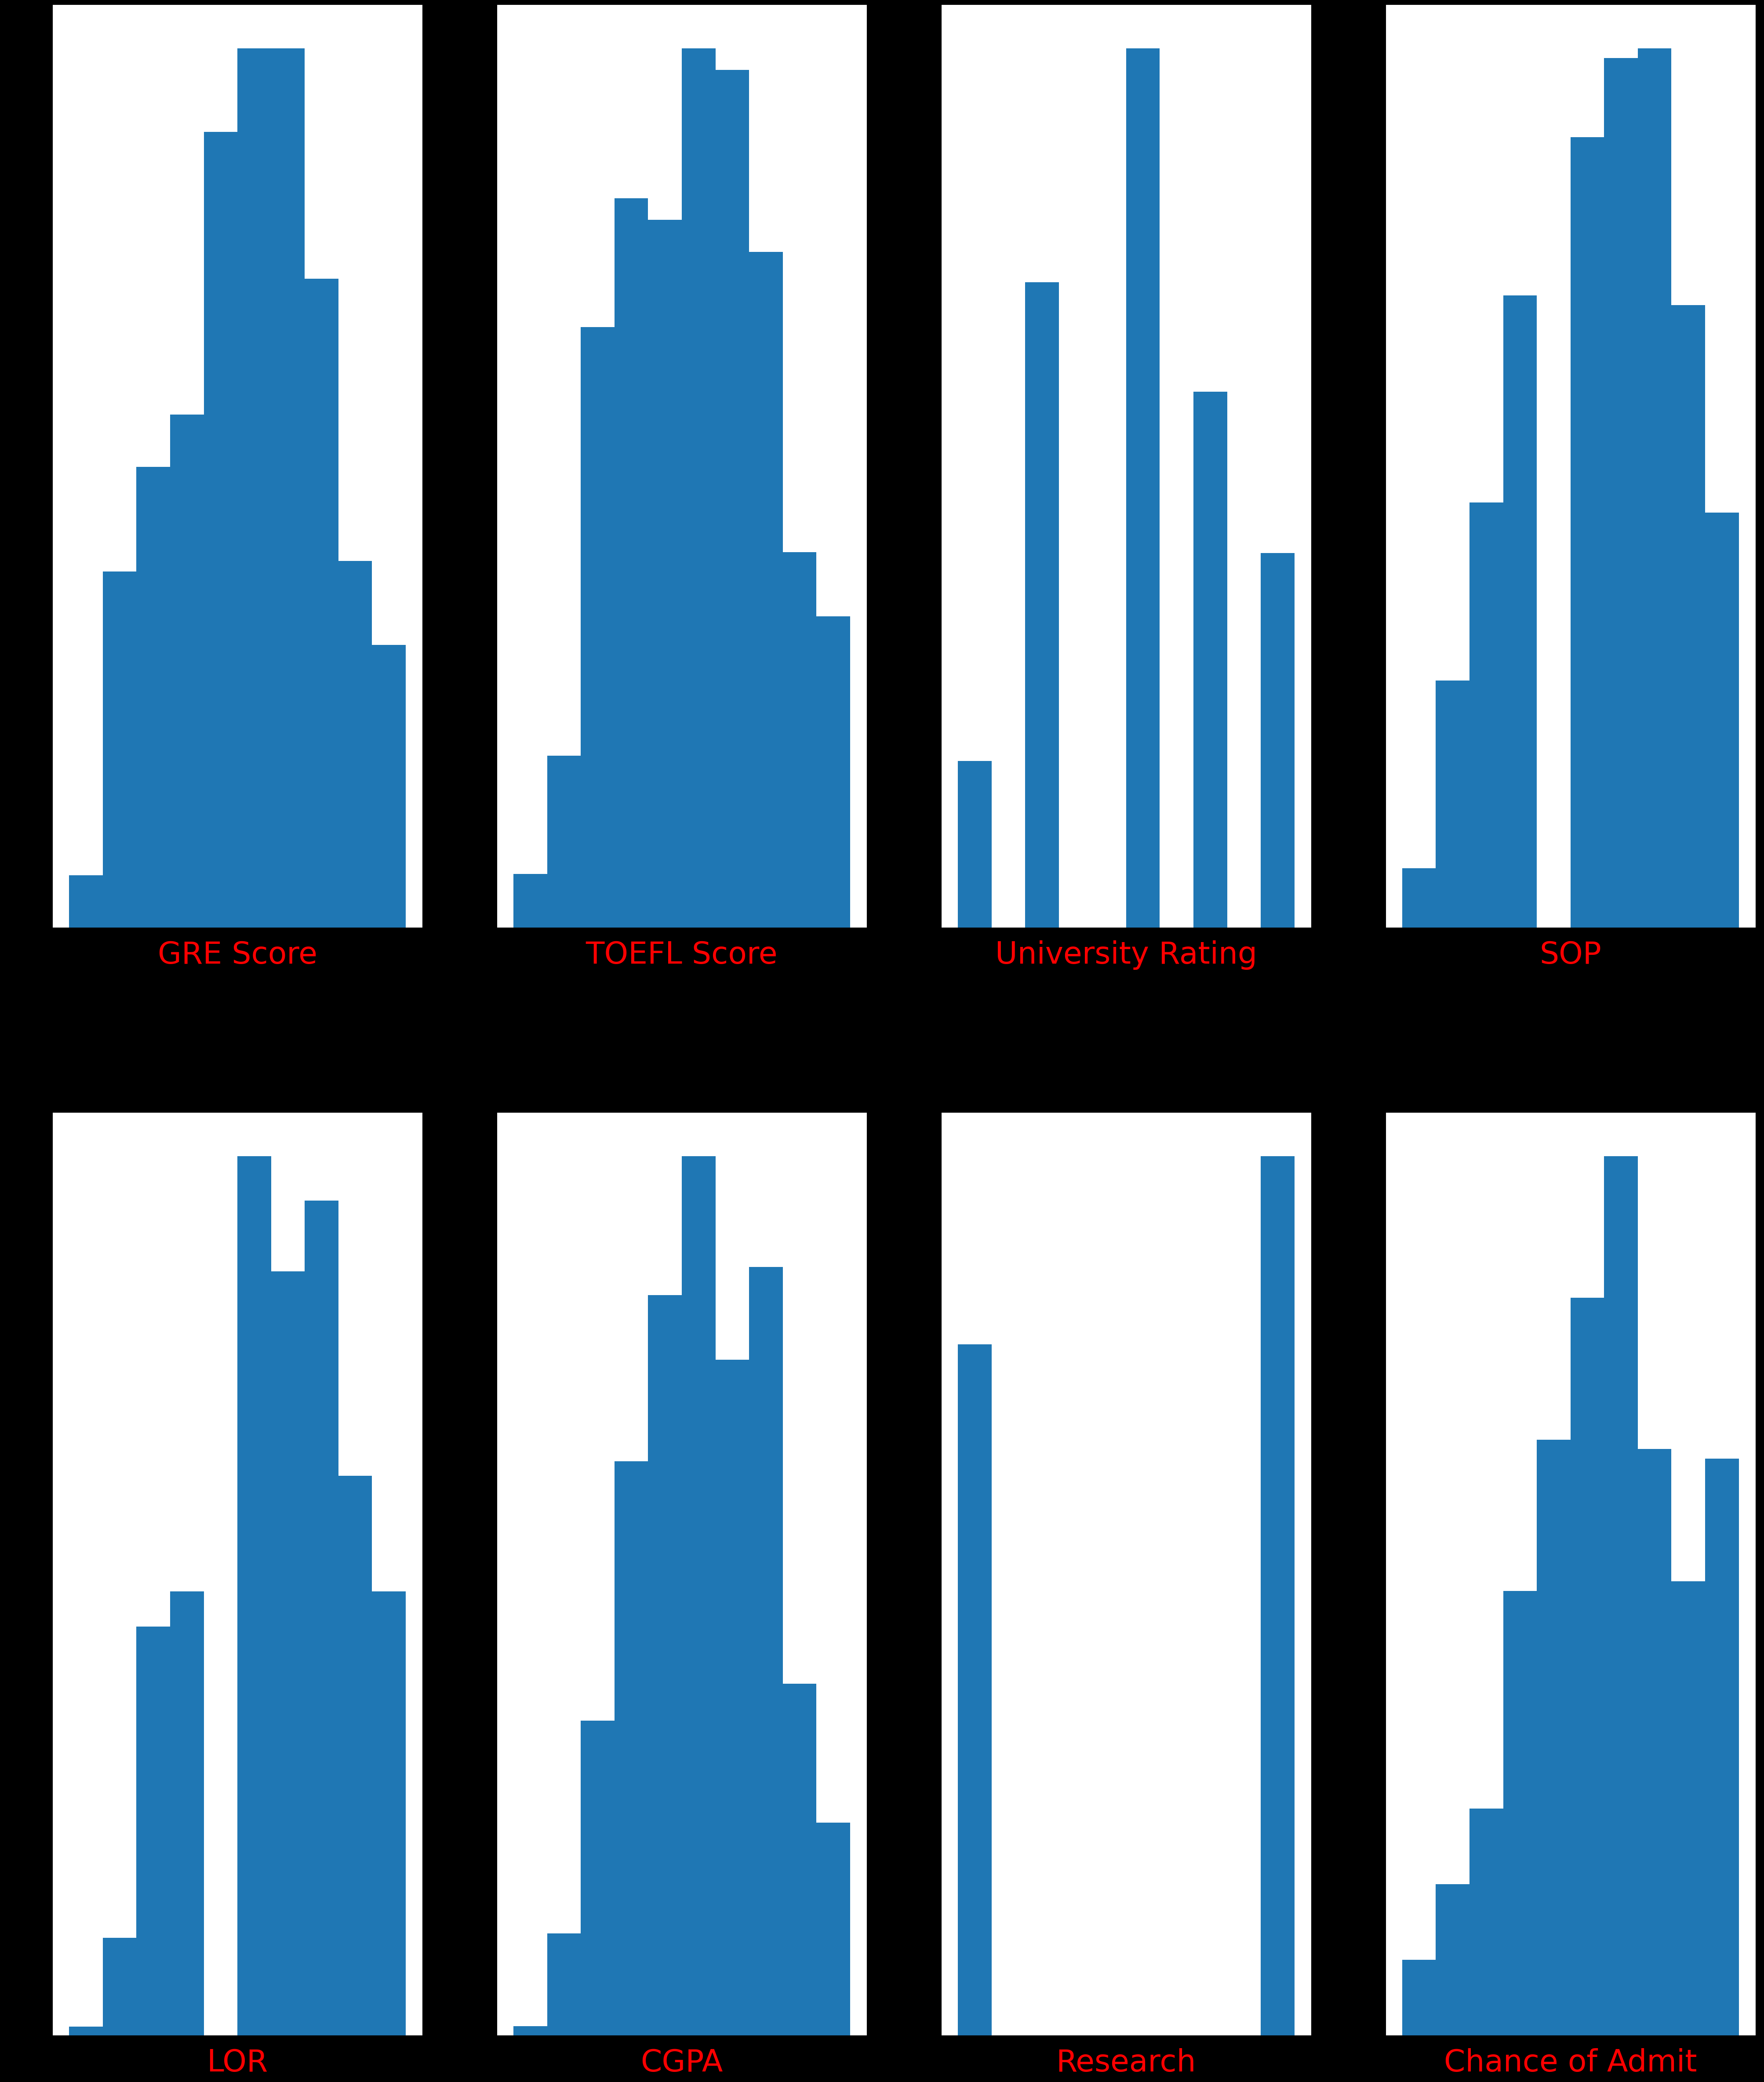

In [43]:
plt.figure(figsize  = (50,60),facecolor = 'black')
plotnumber = 1


for columns in data.columns:
    if plotnumber<=8:
        plt.subplot(2,4,plotnumber)
        plt.hist(x =data[columns])
        plt.xlabel(columns,fontsize = 50 ,color = 'red')
        plt.ylabel('Chance of Admit',fontsize = 50)
    plotnumber+=1
plt.show()

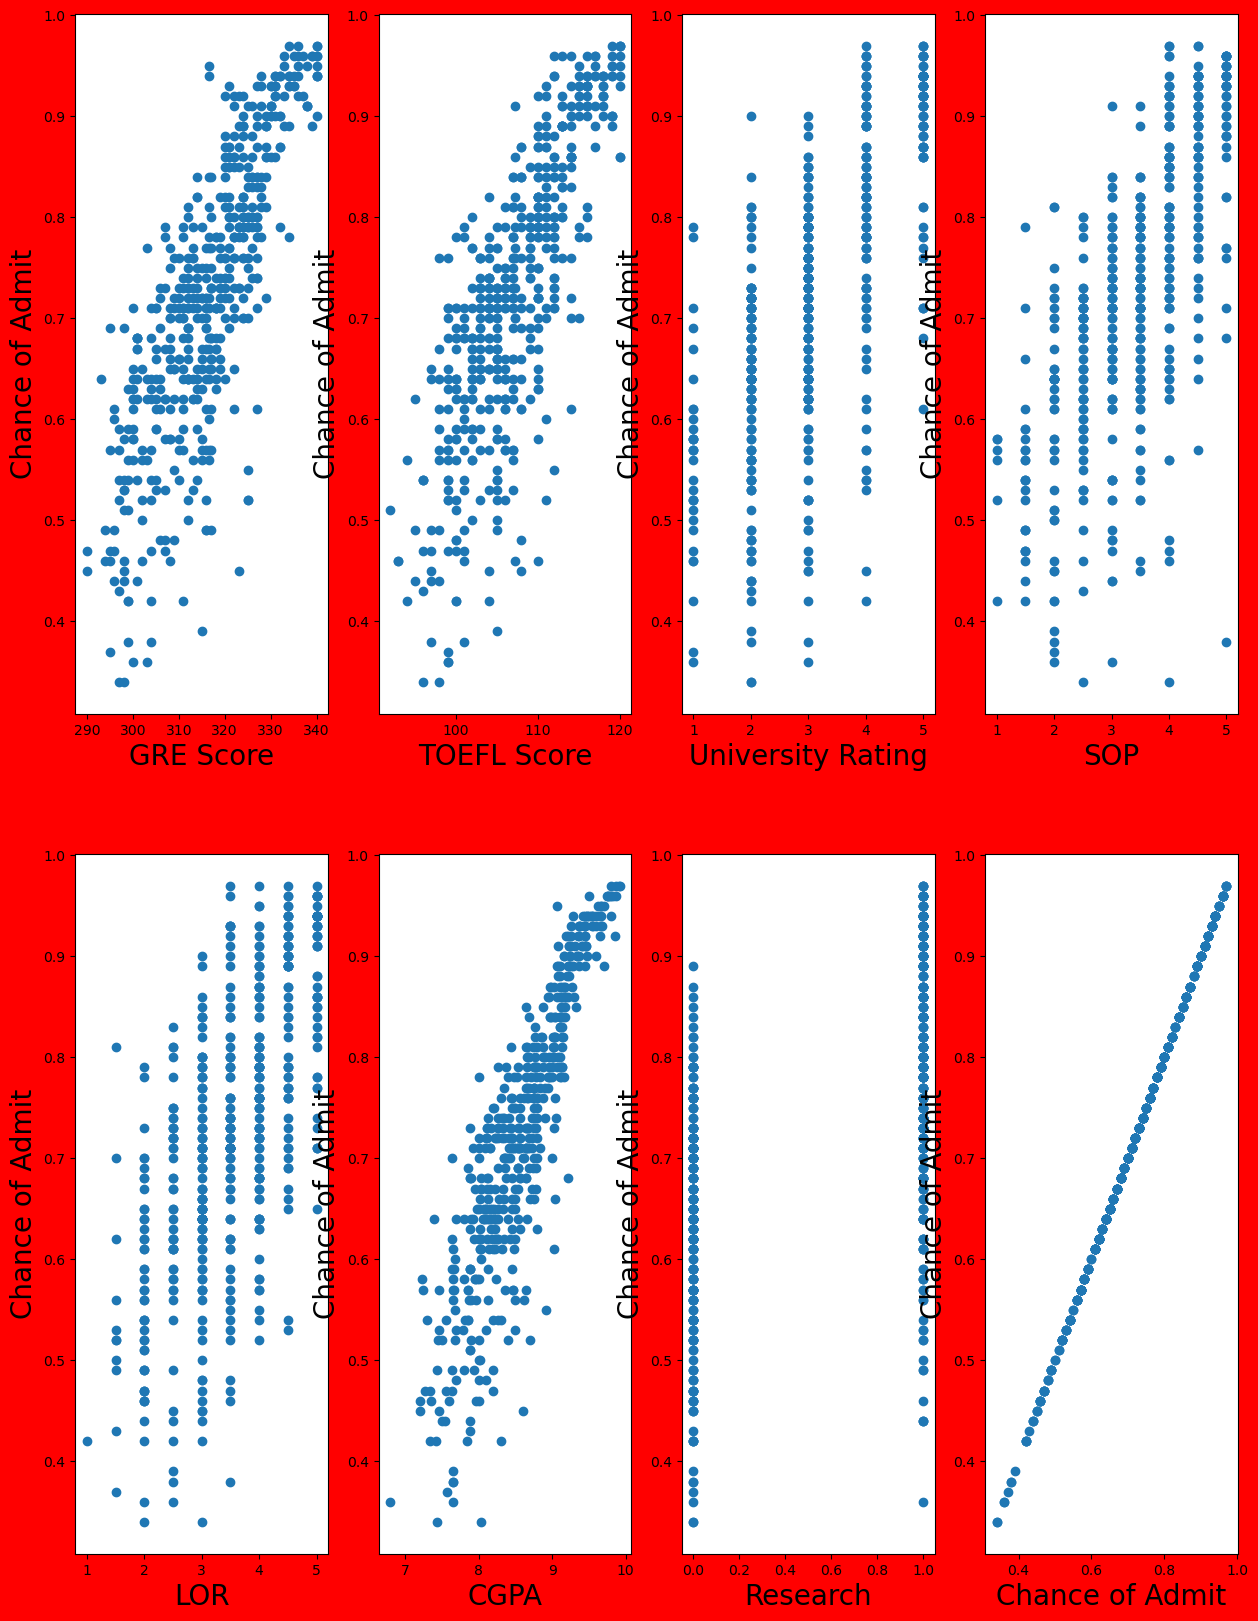

In [10]:
plt.figure(figsize = (15,20),facecolor ='red')
plotnumber =1

for column in data.columns:
    if plotnumber <= 8:
        plt.subplot(2,4,plotnumber)
        plt.scatter(x = data[column],y = data['Chance of Admit'])
        plt.xlabel(column,fontsize =20)
        plt.ylabel("Chance of Admit",fontsize = 20)
    plotnumber +=1
plt.show()

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = 348)
y_train.head(5)


459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

In [14]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [15]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [16]:
linear.score(x_train,y_train)

0.82855357382842

In [17]:
linear.score(x_test,y_test)

0.7928310580010802

In [18]:
x_test[2]

array([1.30185183, 1.4577058 , 0.78200955, 1.13735981, 1.09894429,
       1.42924366, 0.88640526])

In [19]:
predict  = linear.predict(x_test)

In [20]:
predict

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

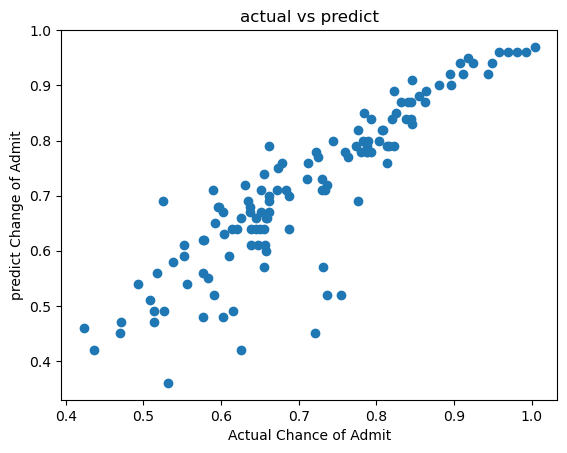

In [21]:
plt.scatter(predict,y_test)
plt.xlabel("Actual Chance of Admit")
plt.ylabel("predict Change of Admit")
plt.title("actual vs predict")
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [23]:
predict = linear.predict(x_test)

In [24]:
mean_absolute_error(y_test,predict)

0.04421359936541998

In [25]:
mean_squared_error(y_test,predict)

0.0043091723323515985

In [26]:
np.sqrt(mean_squared_error(y_test,predict))

0.06564428636485889

In [27]:
from sklearn.linear_model import  LassoCV,Lasso

In [28]:
cv =  LassoCV(alphas = None,max_iter = 10)
cv.fit(x_train,y_train)

LassoCV(max_iter=10)

In [29]:
alpha =  cv.alpha_
alpha

0.0006090008804969982

In [30]:
lasso_reg =  Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0006090008804969982)

In [31]:
lasso_reg.score(x_test,y_test)

0.7938036352038629

In [32]:
from sklearn.linear_model import Ridge ,RidgeCV

In [33]:
np.arange(0.001,0.1,00.1)

array([0.001])

In [34]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,00.1))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001]))

In [35]:
ridgecv.alpha_

0.001

In [36]:
ridge_model = RidgeCV(alphas = ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

RidgeCV(alphas=0.001)

In [37]:
ridge_model.score(x_test,y_test)

0.7928311032443043